---
##6.&nbsp; Challenge: apply this to the spotify dataset 😃
In a new notebook, try out the different scalers and transformers on the Spotify data and compare the results. Which scaler do you feel had the greatest impact? And, maybe, which scaler didn't help at all?

>With the carefully chosen 10 songs, you might not see a massive effect. But soon we'll start working with a Spotify dataset of 5000 songs, where scaling will have a much larger impact.

**If you finish early** and would like to learn more about scaling:
- [SKLearn: Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [SKLearn: Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
#import libraries
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [2]:
#importing data
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter 6 Unsupervised ML/data/6.3.2_spotify_10_songs.csv'
songs = pd.read_csv(url) #reading csv
songs_df = pd.DataFrame(songs) #creating dataframe
songs_df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band ...,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady ...,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março ...,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema ...,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black ...",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing ...,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix ...,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence ...,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [3]:
songs_df.columns


Index(['song_name                                                               ',
       'artist               ', 'danceability ', 'energy  ', 'key ',
       'loudness ', 'mode ', 'speechiness ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ',
       'duration_ms ', 'time_signature ', 'id                     ', 'html'],
      dtype='object')

**column names contain huge spaces in between, we have to clean them**

In [4]:
songs_df.columns = songs_df.columns.str.replace(' ', '')

In [5]:
#after cleaning the column names
songs_df.columns


Index(['song_name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [6]:
#we want to set song name and artist as our index
songs_df = songs_df.set_index(['artist'])
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist,,,,,,,,,,,,,,,,
D12,My Band ...,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
Eminem,The Real Slim Shady ...,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Antônio Carlos Jobim,Águas De Março ...,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
Stan Getz,The Girl From Ipanema ...,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
The Rolling Stones,"Paint It, Black ...",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Dire Straits,Sultans Of Swing ...,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Eats Everything,Space Raiders - Charlotte de Witte Remix ...,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
Amelie Lens,In Silence ...,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [7]:
#I want to drop id and html, duration_ms, time_signature
songs_df_del = songs_df.drop(columns= ['id', 'html', 'duration_ms', 'time_signature', 'song_name', 'tempo', 'loudness'])
songs_df_del

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence
artist,,,,,,,,,
D12,0.851,0.84900,1,0,0.0828,0.49700,0.000002,0.1160,0.8440
Eminem,0.949,0.66100,5,0,0.0572,0.03020,0.000000,0.0454,0.7600
Antônio Carlos Jobim,0.642,0.33900,3,1,0.1400,0.85400,0.000000,0.1050,0.4910
Stan Getz,0.641,0.14000,8,1,0.0390,0.86700,0.001660,0.1050,0.3880
The Rolling Stones,0.464,0.79500,1,1,0.0926,0.04930,0.002440,0.3990,0.6120
Dire Straits,0.733,0.79400,5,1,0.0307,0.06140,0.036700,0.3300,0.9310
Eats Everything,0.749,0.73100,4,1,0.1080,0.00314,0.867000,0.1110,0.0598
Amelie Lens,0.736,0.84500,1,1,0.0377,0.00548,0.901000,0.1110,0.1980
Johannes Brahms,0.184,0.00833,3,1,0.0519,0.98900,0.596000,0.1040,0.2110


In [9]:
song_distances_df = pd.DataFrame(pairwise_distances(songs_df_del),
                                     index=songs_df_del.index,
                                     columns=songs_df_del.index)
song_distances_df

artist,D12,Eminem,Antônio Carlos Jobim,Stan Getz,The Rolling Stones,Dire Straits,Eats Everything,Amelie Lens,Johannes Brahms,Frédéric Chopin
artist,,,,,,,,,,
D12,0.000000,4.034296,2.357802,7.133979,1.219482,4.155012,3.411091,1.576707,2.674076,2.745517
Eminem,4.034296,0.000000,2.441178,3.347956,4.171540,1.085175,1.815072,4.267571,2.755101,2.815946
Antônio Carlos Jobim,2.357802,2.441178,0.000000,5.006055,2.233941,2.258548,1.681594,2.427552,0.882446,1.091169
Stan Getz,7.133979,3.347956,5.006055,0.000000,7.090026,3.229852,4.238930,7.147952,5.062194,5.100954
The Rolling Stones,1.219482,4.171540,2.233941,7.090026,0.000000,4.022939,3.197346,1.069190,2.486379,2.580799
Dire Straits,4.155012,1.085175,2.258548,3.229852,4.022939,0.000000,1.584280,4.163898,2.581058,2.664193
Eats Everything,3.411091,1.815072,1.681594,4.238930,3.197346,1.584280,0.000000,3.006388,1.706721,1.607098
Amelie Lens,1.576707,4.267571,2.427552,7.147952,1.069190,4.163898,3.006388,0.000000,2.462819,2.397331
Johannes Brahms,2.674076,2.755101,0.882446,5.062194,2.486379,2.581058,1.706721,2.462819,0.000000,0.403677


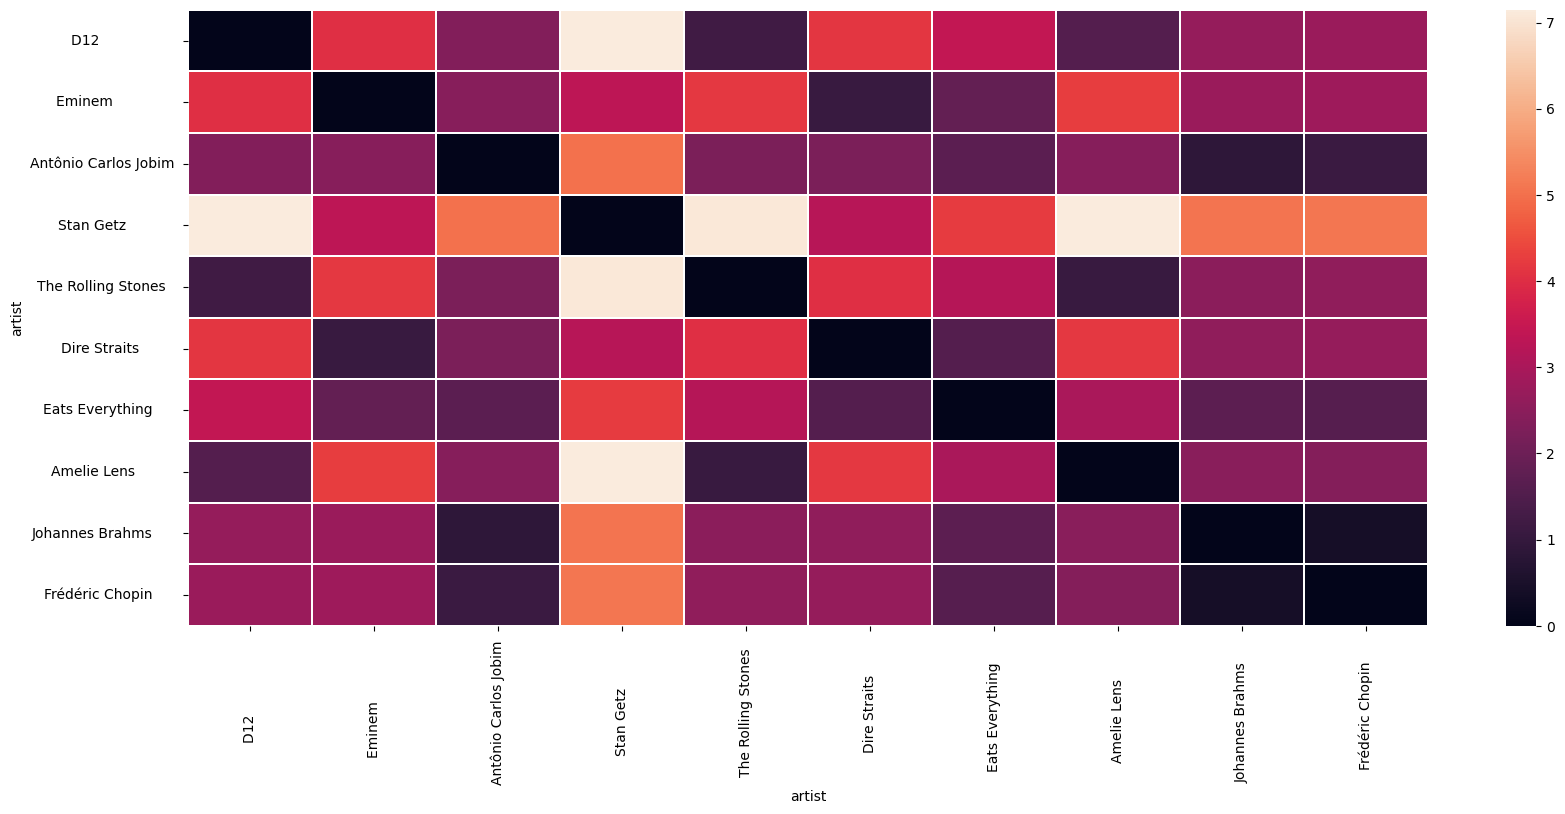

In [10]:
# Stating that we want two plots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
 
# Plotting the two plots
sns.heatmap(song_distances_df, ax=ax1, linewidths=.2);

---
##.&nbsp; Scalers - changing the range, but not the distribution 🎚️
When we scale with SKLearn we get the choice to use a variety of scalers. Scalers do not change the distribution of the data, they change the range of the data.

> **Remember:** Range = Max - Min

&nbsp; Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between.

\begin{align}
newValue = \frac{oldValue - min(column)}{max(column) - min(column)}
    \end{align}

Let's apply Min Max scaling to the small sized DataFrame:

In [12]:
#create a MInMaxscaler object
scaler = MinMaxScaler().set_output(transform='pandas')

#scale the songs_df_del Dataframe
minmax_songs_df_del = scaler.fit_transform(songs_df_del)
minmax_songs_df_del

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence
artist,,,,,,,,,
D12,0.871895,1.000000,0.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138
Eminem,1.000000,0.776369,0.571429,0.0,0.242452,0.027420,0.000000,0.000000,0.803719
Antônio Carlos Jobim,0.598693,0.393341,0.285714,1.0,1.000000,0.862189,0.000000,0.168552,0.494949
Stan Getz,0.597386,0.156625,1.000000,1.0,0.075938,0.875362,0.001818,0.168552,0.376722
The Rolling Stones,0.366013,0.935766,0.000000,1.0,0.566331,0.046775,0.002673,1.000000,0.633838
Dire Straits,0.717647,0.934576,0.571429,1.0,0.000000,0.059036,0.040197,0.804864,1.000000
Eats Everything,0.738562,0.859636,0.428571,1.0,0.707228,0.000000,0.949617,0.185520,0.000000
Amelie Lens,0.721569,0.995242,0.000000,1.0,0.064044,0.002371,0.986857,0.185520,0.158632
Johannes Brahms,0.000000,0.000000,0.285714,1.0,0.193962,0.998987,0.652793,0.165724,0.173554


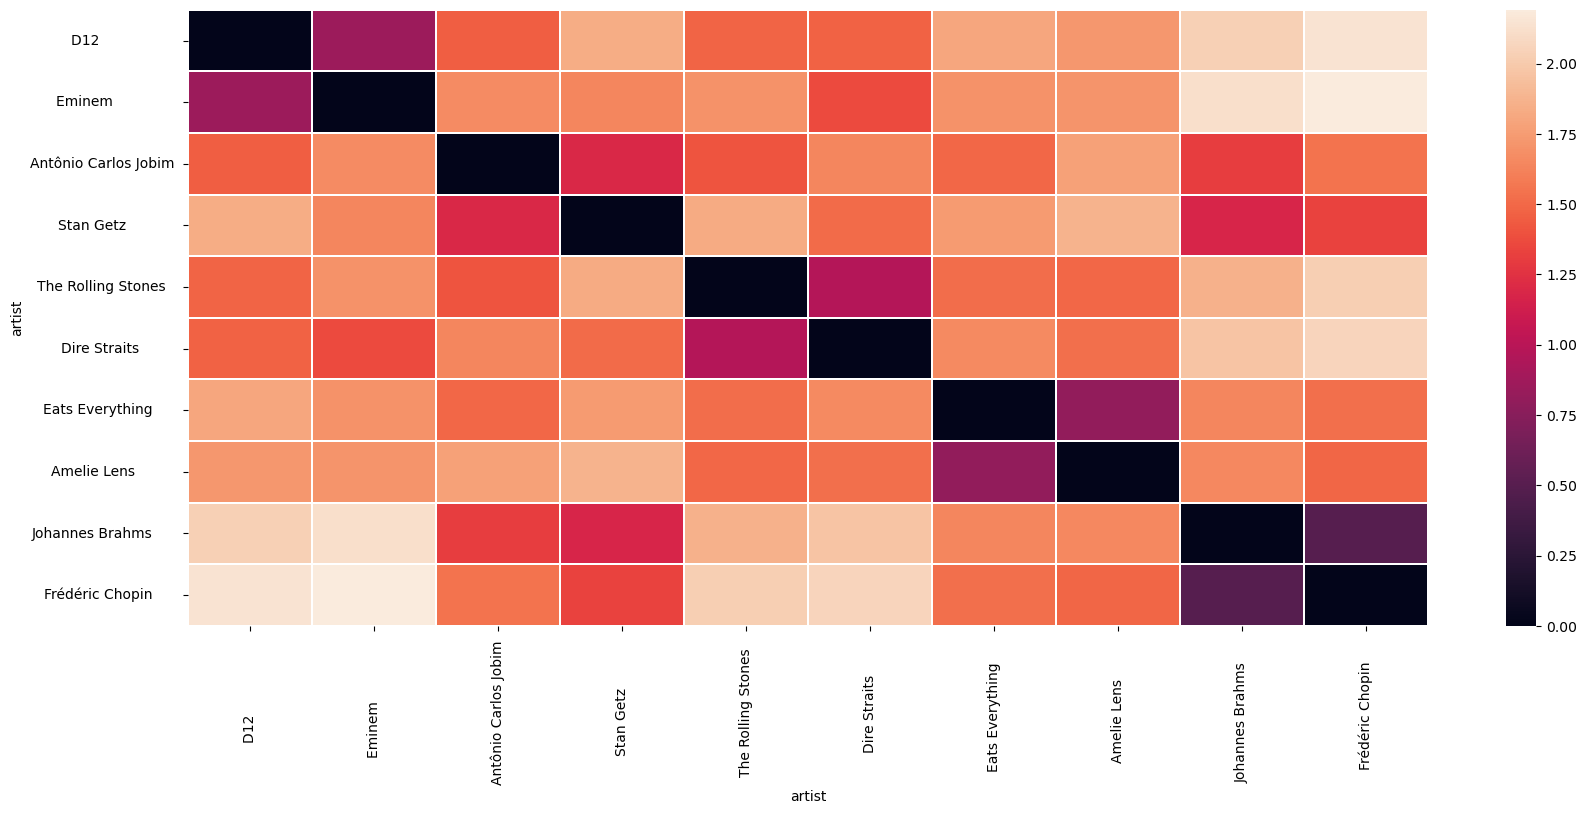

In [15]:
#creating heatmap

song_distances_minmax = pd.DataFrame(pairwise_distances(minmax_songs_df_del),
                                     index=minmax_songs_df_del.index,
                                     columns=minmax_songs_df_del.index)
song_distances_minmax

# Stating that we want two plots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
 
# Plotting the two plots
sns.heatmap(song_distances_minmax, ax=ax1, linewidths=.2);

In [16]:
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist,,,,,,,,,,,,,,,,
D12,My Band ...,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
Eminem,The Real Slim Shady ...,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Antônio Carlos Jobim,Águas De Março ...,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
Stan Getz,The Girl From Ipanema ...,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
The Rolling Stones,"Paint It, Black ...",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Dire Straits,Sultans Of Swing ...,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Eats Everything,Space Raiders - Charlotte de Witte Remix ...,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
Amelie Lens,In Silence ...,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [18]:
songs_df_cl = songs_df.drop(columns= ['id', 'html','song_name'])
songs_df_cl 


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


**APPLYING MIN MAX SCALER TO THE WHOLE DATAFRAME**

In [19]:
scaler_mm = MinMaxScaler().set_output(transform="pandas")
songs_df_cl_mm = scaler_mm.fit_transform(songs_df_cl)
songs_df_cl_mm

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0


**comapre loudness before and after minmax scaling**

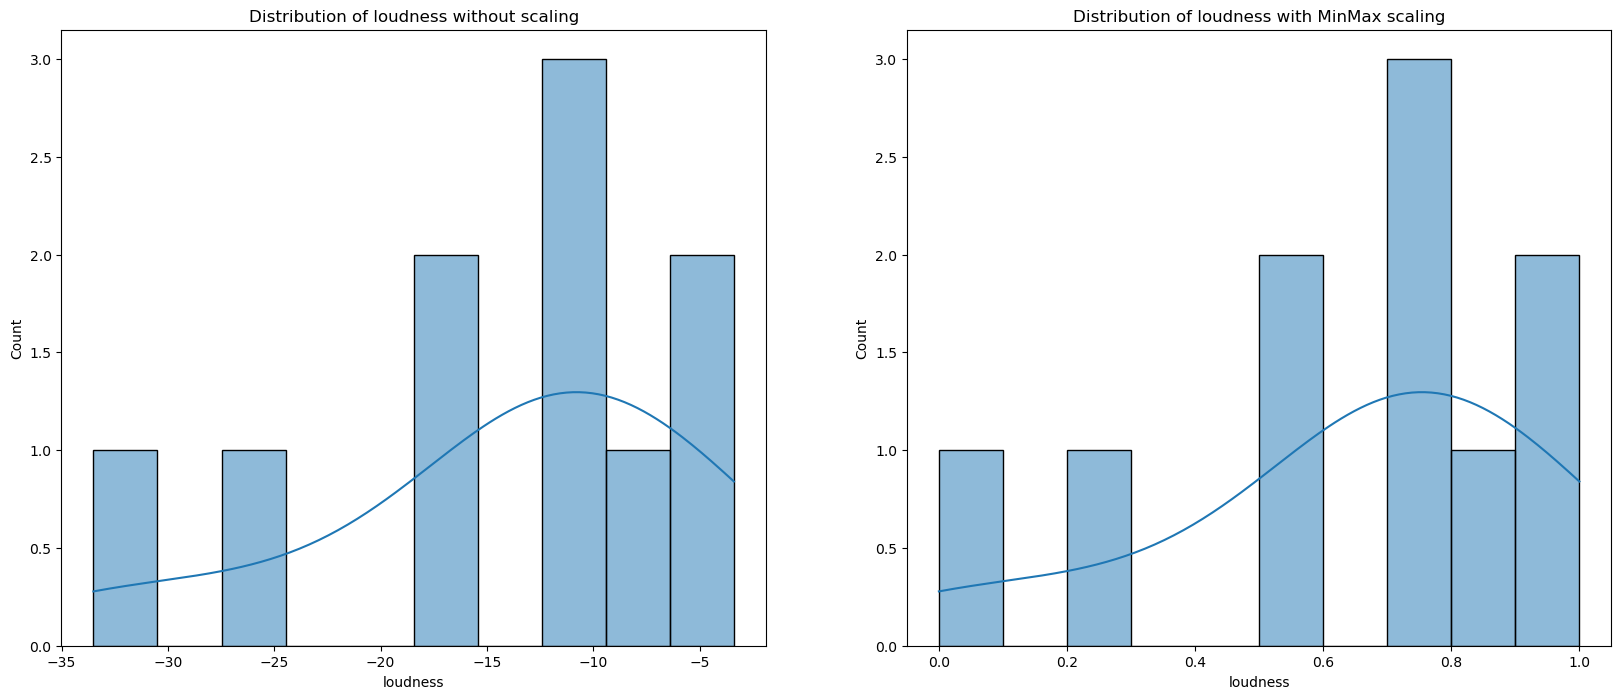

In [20]:
#plotting loudness
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax= ax1);
sns.histplot(songs_df_cl_mm.iloc[:,3], bins=10, kde=True, ax= ax2);

# Adding titles to the plots
ax1.set_title('Distribution of loudness without scaling')
ax2.set_title('Distribution of loudness with MinMax scaling')

plt.show()

In [ ]:
#comparing heatmap of two data frame before and after applying min max scaling
